<a href="https://colab.research.google.com/github/Janina712/PUS2024_JBoecher/blob/main/HW3/HW3_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

# 1) read in the data
read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/refs/heads/main/HW3/water_consumption.csv", index_col=0)

In [3]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [4]:
# prompt: convert the second column of df to datetime
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])

In [5]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29 00:00:00,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12 00:00:00,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26 00:00:00,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10 00:00:00,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


In [6]:
#using df.info you get the data type for each feature (=column) - datetime shows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 21.0+ KB


# 2) Descriptive statistics

Plot all features against date:


/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0]

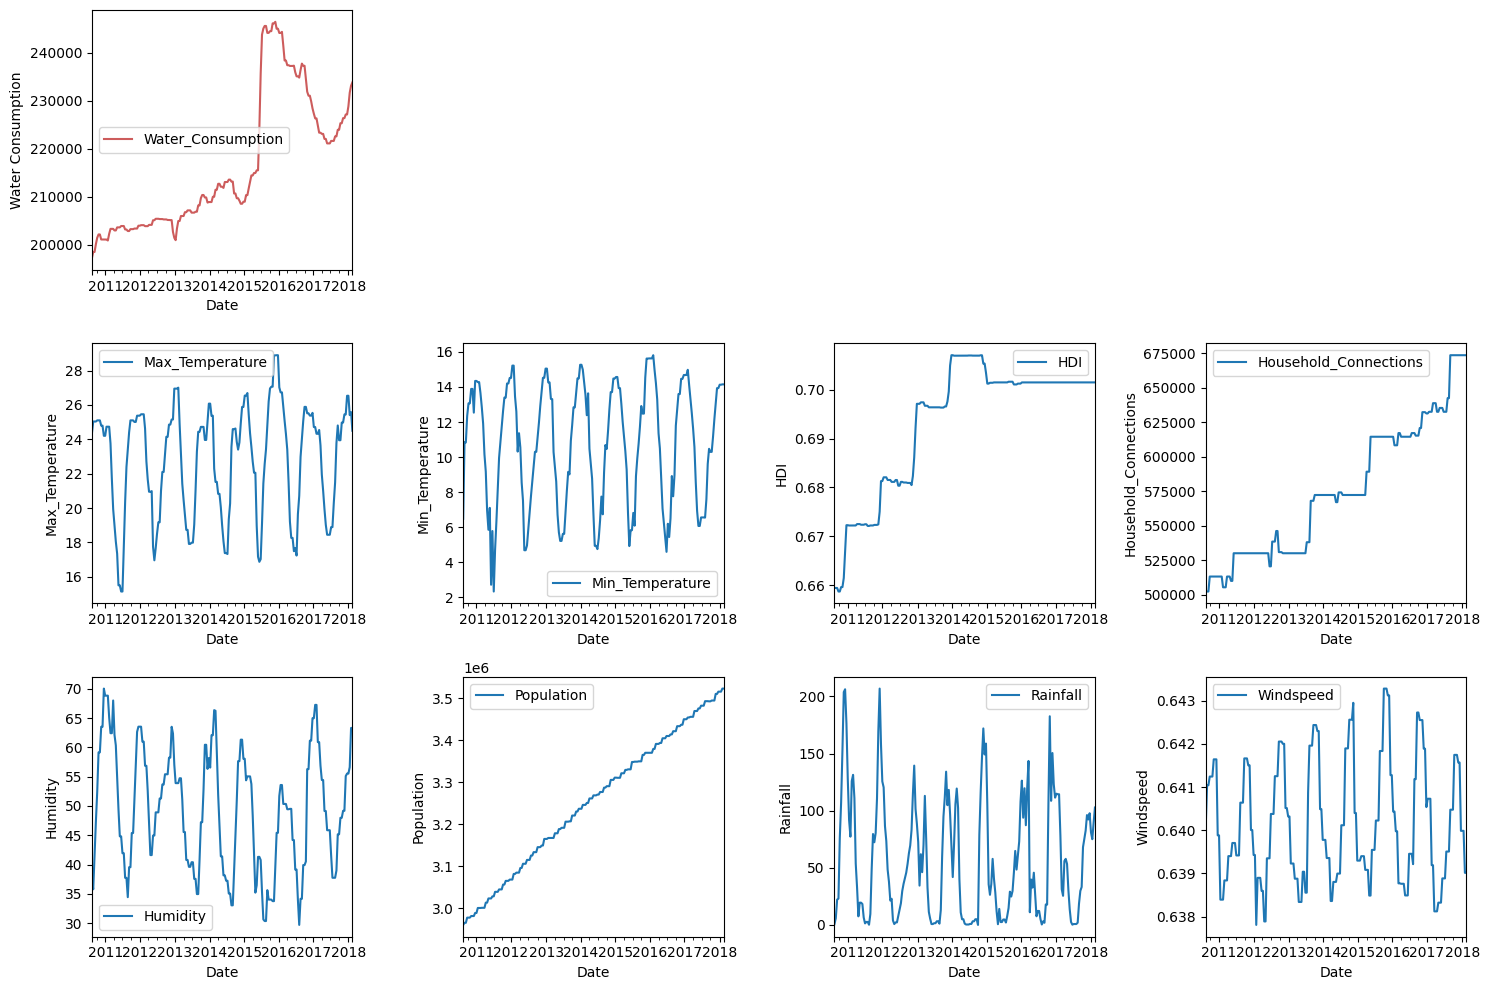

In [7]:
# Plotting all features against Date
column_names = df.columns

plt.figure(figsize=(15, 10))
ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

plus = 4
for i in range(1,10):
  if i == 5:
    plus = 3
    continue
  else:
    ax = plt.subplot(3, 4, i+plus)
    df.plot('Date', column_names[i], ax=ax)
    plt.ylabel(column_names[i])
    plt.xlabel('Date')


plt.tight_layout()
plt.show()

**Figure 1.** Plot showing how each feature of the water consumption dataset (Max_Temperature, Min_Temperature, HDI,	Household_Connections,	Water_Consumption,	Humidity,	Population,	Rainfall, and	Windspeed) evolves over time (2011 to 2018). Water consumption is going to be the outcome variable y and is plotted in the first row in red. The shape of the graph indicates an overall steady incline in water consumption from 2011 to 2015 and a drastic increase in 2016, which goes down in the following two years but remains higher than before the spike occured. This trend suggests that some event triggered a change point in water consumption in 2016, perhaps a drought that increased the water demand for agriculture (max temperature indicates ~1.5 degrees warmer than previous year). The remaining numerical variables are used as predictor variables x in the analysis below and are plotted in rows 2 and 3. Strikingly, all weather related variables exhibit a seasonal pattern, including max and min temperature, humidity, rainfall, and windspeed. Household connections and human development index (HDI) increase in a stepwise fashion. This pattern suggest that some event(s) that influences these variables occurs annually (maybe HDI is evaluated every January (?)). Finally, the population variable increases steadily in almost a perfect line.

In [8]:
# use the method describe to see the statistical properties of the dataframe
df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281


**Table 1**. This table shows statistical properties of each variable, including measures of central tendency (mean, median (50%)) and spread (std, min, max, 25%, 75%) and the number of observations/rows. The first thing I notice is that the values are at vastly different scales for different variables. From just looking at the numbers, it is hard to conceptualize the distributions and compare them. Plotting the distributions will make it much easier to comment on skew and kurtosis and to compare across variables.  

Plot a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

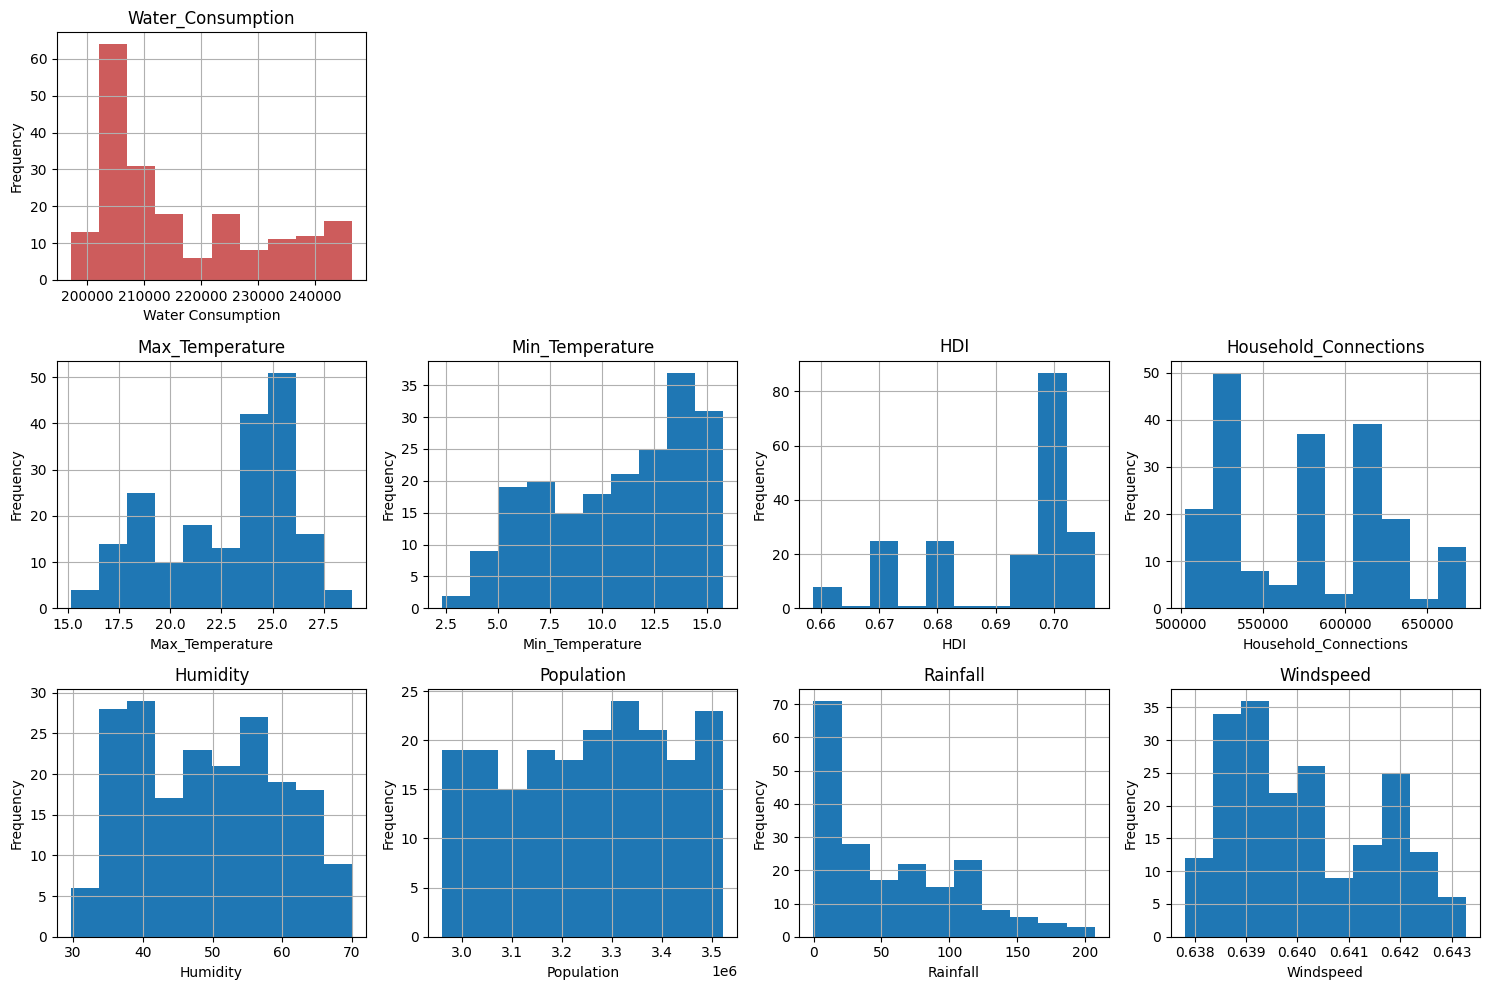

In [9]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(3, 4, 1)
df.hist('Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')

plus = 4
for i in range(1,10):
  if i == 5:
    plus = 3
    continue
  else:
    ax = plt.subplot(3, 4, i+plus)
    df.hist(column_names[i], ax=ax)
    plt.ylabel('Frequency')
    plt.xlabel(column_names[i])

plt.tight_layout()
plt.show()

**Figure 2.** Histograms showing the frequency distribution of each variable  of the water consumption dataset (Max_Temperature, Min_Temperature, HDI, Household_Connections, Water_Consumption, Humidity, Population, Rainfall, and Windspeed). Water consumption is going to be the outcome variable y and is plotted in the first row in red.This histogram shows a peak between 200,000 and 210,000 indicating that over the time period from 2011 to 2018 water consumption was within that range on a given observation. Sometimes, water consumption was higher up to 240,000, but never below ~200,000. Weather related variables (excluding rainfall) have two visible peaks in their distribution pointing to two main seasons with the hotter season being longer (higher peak) than the colder season (lower peak). For example, max temperature is most frequently around 25 degrees and also often (although less often) around 18 to 19. This may represent a longer summer and a relatively shorter winter. HDI and household connections exhibit multiple peaks (corresponding to stepwise increase) and the population histogram is fairly flat (steady increase, each population count occurs approximately the same number of times). None of the distributions look especially gaussian.   

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

In [10]:
df_copy = df  # make copy of dataframe
corr_mat = df_copy.iloc[:,1:].corr()
corr_mat

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


**Table 2.** This table shows a correlation matrix. The correlation coefficient r is displayed for each possible combination of variables (9 x 9). The diagonal from the upper left to the lower right consitutes of r=1, as each variable is correlated with itself. Given that water consumption is the outcome variable we are interested in, we can look at row 5 (=4 in python) to identify which predictor variables are correlated with water consumption. Household connections is highliy correlated with water consumption (r = .81) followed by population (r =.79), and HDI (r =.59). Other variables, such as min temperature (r =.06) and rainfall (r =-.06) don't seem to be related to water consumption at all.  

In [11]:
# sort by correlation value
df_short = corr_mat["Water_Consumption"]
df_short.sort_values(ascending = False)

,Water_Consumption
Water_Consumption,1.000000
Household_Connections,0.811606
Population,0.793164
HDI,0.594874
Windspeed,0.171201
Max_Temperature,0.160549
Min_Temperature,0.055879
Rainfall,-0.064579
Humidity,-0.312399


**QUESTION**: What is the maximum result you can get with unvariate linear regression based on the correlation result and the model's R^2?

Hint: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php#:~:text=What%20is%20the%20Coefficient%20of,0.6%20x%200.6%20%3D%200.36).

Highest correlation result:

$r$ = 0.81; $r^2$ = 0.81 * 0.81 = 0.66

Based on the correlation coefficients, we can derive the coefficient of determination ($r^2$). The coefficient of determination quantifies how much variance in the outcome variable y can be accounted for by the predictor variable x. The maximum result (maximum $r^2$) that a univariate linear regression model could achieve in predicting water consumption is 0.66, given that household connections is x.

# 3) Linear Regression

## 3A) Univariate model

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [12]:
x = df_copy[['Household_Connections']] # double brackets to get 2D
y = df_copy['Water_Consumption']

In [13]:
# build regression model and make predictions
model_univariate = LinearRegression()
fit_muv = model_univariate.fit(x,y)
prediction = fit_muv.predict(x)

In [14]:
# model parameters
a = fit_muv.coef_[0]
b = fit_muv.intercept_
equation = "{}x+{}".format(a,b)
equation

'0.2355345525992826x+80543.246953786'

In [15]:
# goodness of fit
mse = mean_squared_error(y, prediction)
R_2 = fit_muv.score(x,y)
print("Coefficient of determination (R squared) is", round(R_2,3))
print("Mean squared error (MSE) is", round(mse))

Coefficient of determination (R squared) is 0.659
Mean squared error (MSE) is 67817351


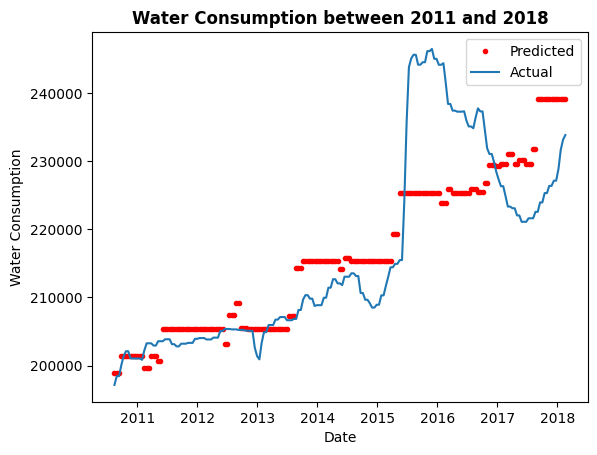

In [16]:
plt.plot(df['Date'], prediction, 'r.')
plt.plot(df['Date'],y)
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption between 2011 and 2018', weight = 'bold')
plt.legend({"Predicted","Actual"});

**Figure 3**. This plot shows acutal (blue line) and predicted (red dots) water consumption between 2011 and 2018. The predictions are based on a univariate regression model that uses household connections as the predictor of water consumption. The pattern of the red dots reflects the stepwise increase that is present in the household connections distribution. While the overall increasing trend of household connections mirrors the overall increasing trend of water consumption, the current model fails to predict that water consumption increases steadily until 2015/2016 and then drastically increases before tapering off again towards 2018.

As expected based on the correlation result, $r^2$ of the current univariate regression model is .66.

#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [17]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable
# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        19:57:40   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

Look at the R^2 above, and at the P>|t|, what do they represent?

$r^2$ from univariate regression model with household connections: 0.659

P>|t|for household connections from the OLS model: 0.026

$r^2$ is the coefficient of determination, which represents the variance in water consumption that can be accounted for by household connections. P>|t| represents the probability that "by chance" household connections would have that influence on the model, even if it did not explain water consumption.

It seems that the probability of household connections explaining the variance in water consumption (66%) by chance is pretty low (2.6%). Although the predictions erroneously reflect characteristics of the household connections distribution that are not present in the water consumption distribution, the overall trend is still accounted for.    

Assiming a p-value of 0.05, report in a cell of text below which variables are significant in the fit:

Humidity (*p* = .000), Min_temperature (*p* = .002), Population (*p* = .025), Household Connections (*p* = .026), Max_temperature (*p* = .027), HDI (*p* = .027)

# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [18]:
# Select the numerical features
numerical_features = list(column_names[1:])
numerical_features

['Max_Temperature',
 'Min_Temperature',
 'HDI',
 'Household_Connections',
 'Water_Consumption',
 'Humidity',
 'Population',
 'Rainfall',
 'Windspeed']

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [19]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

to generate the scaled features transform the original feature set

In [20]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

In [21]:
scaled_features = pd.DataFrame(scaled_features)
scaled_features.columns = numerical_features

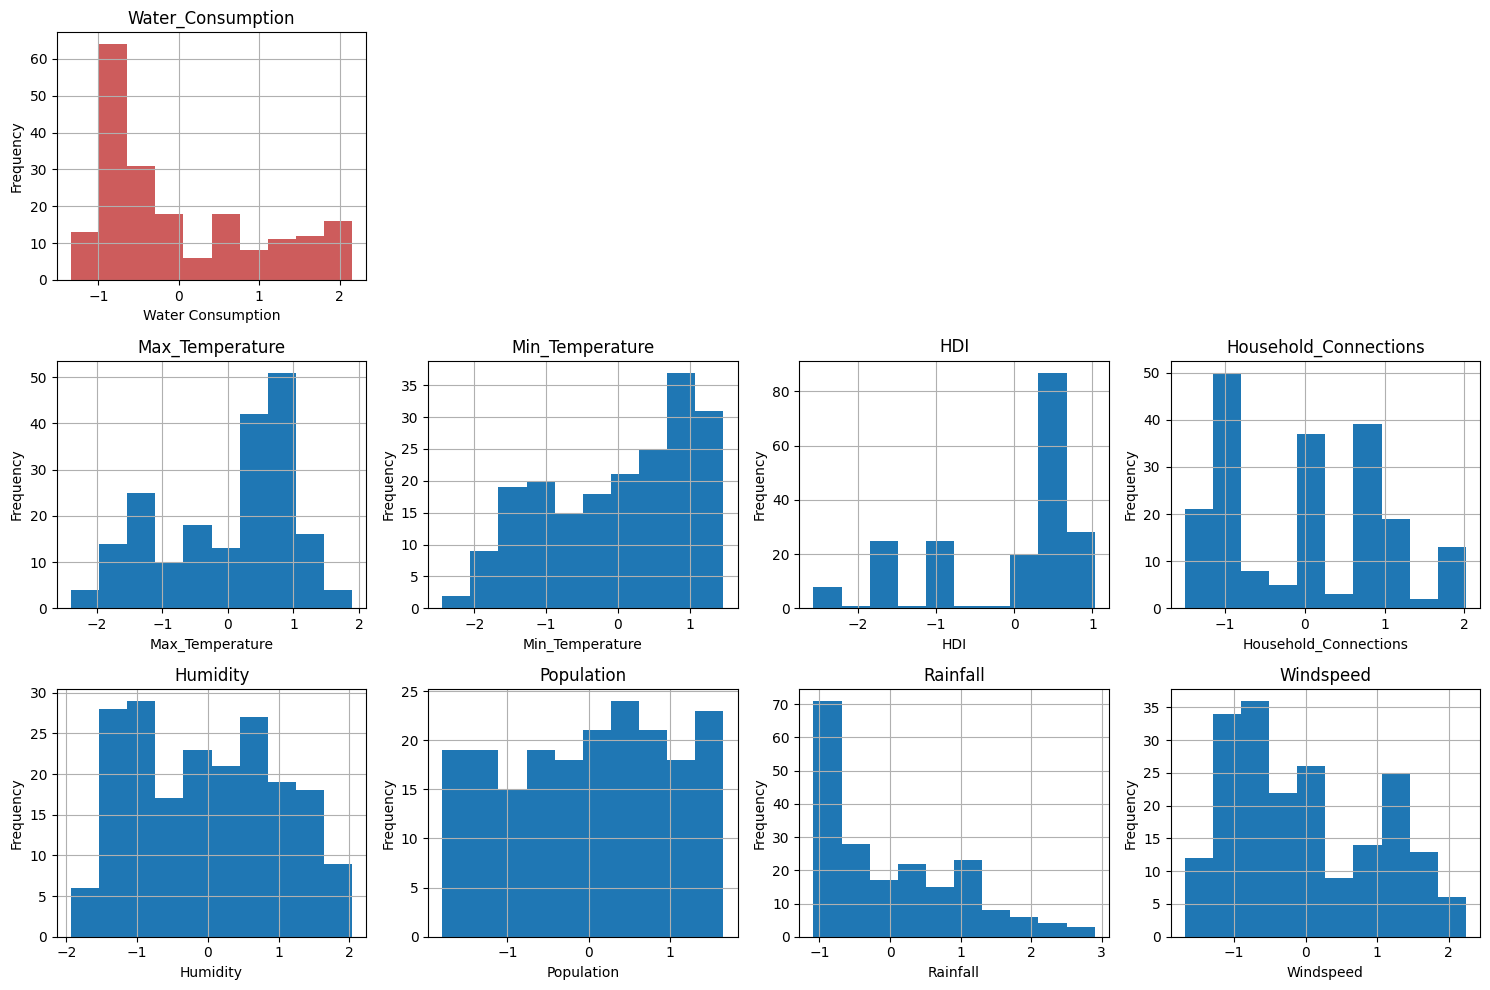

In [22]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(3, 4, 1)
scaled_features.hist(numerical_features[4], ax=ax, color='IndianRed')
plt.ylabel('Frequency')
plt.xlabel('Water Consumption')

plus = 5
for i in range(0,9):
  if i == 4:
    plus = 4
    continue
  else:
    ax = plt.subplot(3, 4, i+plus)
    scaled_features.hist(numerical_features[i], ax=ax)
    plt.ylabel('Frequency')
    plt.xlabel(numerical_features[i])

plt.tight_layout()
plt.show()

**Figure 4**. Histograms showing the frequency distribution of each standardized variable of the water consumption dataset (Max_Temperature, Min_Temperature, HDI, Household_Connections, Water_Consumption, Humidity, Population, Rainfall, and Windspeed). The shape of the distributions is identical to those described in figure 2. As a result of standardization (mean = 0, std = 1), the x-axis is now centered at zero for all variables and allows for a more direct comparison between variables.

save the features in a new dataset

In [23]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the widened DataFrame
df_copy

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186
2010-08-29,2010-08-29 00:00:00,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199
2010-09-12,2010-09-12 00:00:00,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199
2010-09-26,2010-09-26 00:00:00,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965
2010-10-10,2010-10-10 00:00:00,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24 00:00:00,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872
2018-01-07,2018-01-07 00:00:00,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872
2018-01-21,2018-01-21 00:00:00,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872
2018-02-04,2018-02-04 00:00:00,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696


look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

In [24]:
df_copy.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,-5.906161e-16,-4.756488e-16,-3.678952e-15,7.934995e-16,-5.770905e-16,5.049542e-16,1.154181e-15,-8.115336e-17,-4.057668e-15
std,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00,1.002548e+00
min,-2.393547e+00,-2.445776e+00,-2.564927e+00,-1.505371e+00,-1.342012e+00,-1.934995e+00,-1.802439e+00,-1.085034e+00,-1.691723e+00
25%,-7.937844e-01,-9.176750e-01,-8.858643e-01,-9.345023e-01,-8.495739e-01,-8.681048e-01,-8.504396e-01,-9.392207e-01,-8.256964e-01
50%,3.569740e-01,1.744785e-01,6.138774e-01,-6.578941e-02,-4.095261e-01,8.012208e-03,9.447330e-02,-2.963264e-01,-2.026068e-01
75%,7.124252e-01,9.226273e-01,6.152173e-01,8.029235e-01,7.268914e-01,7.600314e-01,8.480413e-01,7.673965e-01,7.994209e-01
max,1.895133e+00,1.468239e+00,1.028777e+00,2.019122e+00,2.155878e+00,2.041346e+00,1.658304e+00,2.899909e+00,2.239020e+00


**Table 2**. This table shows statistical properties of each standardized variable, including measures of central tendency (mean, median (50%)) and spread (std, min, max, 25%, 75%) and the number of observations/rows. The results make sense, given that for all variables the mean is very close to zero and the standard deviation very close to 1.

### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [25]:
# prompt: multilinear regression with all variables in the dataframe except data within water consumption as endogenous variable with sklearn
# Select the features (independent variables)
vars = numerical_features[0:4] + numerical_features[5:9] # without water consumption, which is y
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3,  random_state = 73)

### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [26]:
# Create a Linear Regression model
model_multivariate = LinearRegression()

# Fit the model to the training data
model1 = model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {round(mse,3)}")
print(f"R-squared: {round(r2,3)}")

Mean Squared Error: 0.287
R-squared: 0.718


In [27]:
# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model1.coef_)))
print("Intercept:", model1.intercept_)

Coefficients: [('Max_Temperature', -0.1668193633980498), ('Min_Temperature', 0.38063171664322487), ('HDI', -0.20347104093285112), ('Household_Connections', 0.36529414908845725), ('Humidity', -0.4902477705839768), ('Population', 0.4961355065896503), ('Rainfall', 0.12967524586183446), ('Windspeed', -0.00904147549654788)]
Intercept: -0.0070081415591246345


### 3C-5 Visualize the model

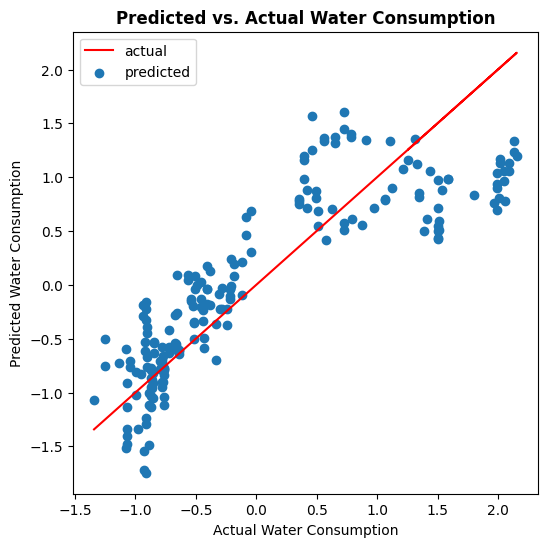

In [28]:
# prompt: plot predicted vs actual water_consumption based on sklearn model
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.plot(y, y,'r')  # actual water consumption
plt.scatter(y, model_multivariate.predict(X1)) # predicted water consumption
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs. Actual Water Consumption", weight ="bold")
plt.legend({'predicted','actual'})
plt.show()

**Figure 5**. This plot shows actual (red line) water consumption vs. perdicted (blue dots) water consumption. The predictions were made based on a multivariate regression model using all 8 available numerical variables. 70% of 197 observations were used to train the model. $R^2$ of this model was 0.674 and the mean squared error was 0.374. The predictions seem somewhat better at lower water consumption values compared to higher water consumption values as indicated by the blue dots being scattered more densely and closely to the red line at x values between -1.5 to 0, as opposed to from 0.5 to 2.

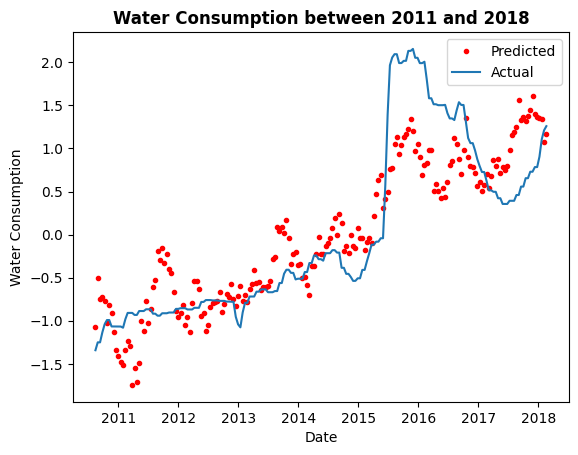

In [29]:
plt.plot(df['Date'], model1.predict(X1), 'r.')
plt.plot(df['Date'], y)
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption between 2011 and 2018', weight = 'bold')
plt.legend({"Predicted","Actual"});

**Figure 6**. This plot shows acutal (blue line) and predicted (red dots) water consumption between 2011 and 2018. The predictions are based on a multivariate regression model that uses Max_Temperature, Min_Temperature, HDI, Household_Connections, Humidity, Population, Rainfall, and Windspeed as predictors of water consumption. The pattern of the red dots now reflects more of the cyclic seasonal trend that is present in the weather-related variables and does better at capturing the large spike near 2016. While the shape of the predictions now resembles the actual data more than in Figure 3, the current model suggests more sinusoidal behavior than is actually present in the water consumption data. Also, the spike is more pronounced in reality as opposed to the prediction.

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [30]:
corr_table = df_copy.iloc[:,1:].corr() > 0.5
corr_table

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,True,True,False,False,False,False,False,True,False
Min_Temperature,True,True,False,False,False,True,False,True,False
HDI,False,False,True,True,True,False,True,False,False
Household_Connections,False,False,True,True,True,False,True,False,False
Water_Consumption,False,False,True,True,True,False,True,False,False
Humidity,False,True,False,False,False,True,False,True,False
Population,False,False,True,True,True,False,True,False,False
Rainfall,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,True


**Table 3**: Correlation matrix indicated which pairwise correlations have a correlation coefficient greater than 0.5 (= True). For water consumption, those variables are HDI, household connections, and population.

In [31]:
vars2= list(corr_table.loc[corr_table['Water_Consumption']==True].index) # extract true
vars2.remove('Water_Consumption') #remove autoccorrelation
print(vars2)

['HDI', 'Household_Connections', 'Population']


### 3D - 2) redo a multivariate fit with sklearn, just like above

In [32]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state = 73)

# Create a Linear Regression model
model_multivariate = LinearRegression()

# Fit the model to the training data
model2 = model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Squared Error: {round(mse,3)}")
print(f"R-squared: {round(r2,3)}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars2, model2.coef_)))
print("Intercept:", model2.intercept_)

Mean Squared Error: 0.343
R-squared: 0.663
Coefficients: [('HDI', -0.017514129824181504), ('Household_Connections', 0.5585060199715814), ('Population', 0.24701064315475668)]
Intercept: -0.013913645575460966


# 3D - 3) plot the model predictions, just like above

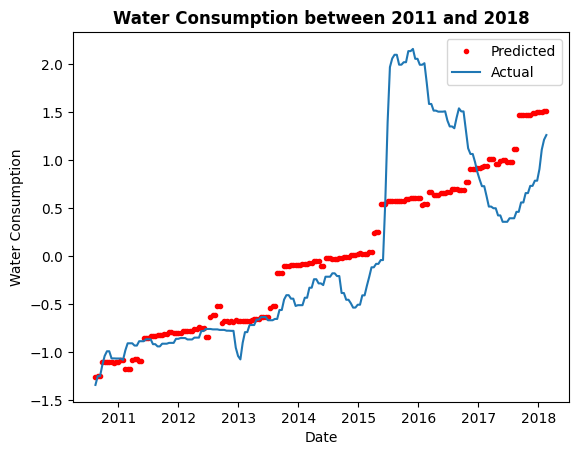

In [33]:
plt.plot(df['Date'], model_multivariate.predict(X2), 'r.')
plt.plot(df['Date'], y)
plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption between 2011 and 2018', weight = 'bold')
plt.legend({"Predicted","Actual"});

**Figure 7**. This plot shows acutal (blue line) and predicted (red dots) water consumption between 2011 and 2018. The predictions are based on a multivariate regression model that uses HDI, Household_Connections, and Population as predictors of water consumption. The overall trend is increasing. As opposed to the univariate regression model, the predictions are more linearly increasing, which reflects the real data better. As opposed to the multivariate regression model with all variables as predictors, there is no seasonality in the prediction trend, which reflects the real data better. The drastic spike in 2015/2016 is still not predicted well. Other variables not considered here may be related to this water consumption increase or maybe data from 7 years in insufficient to detect more long-term trends (e.g., extreme drought once a decade, etc.).   

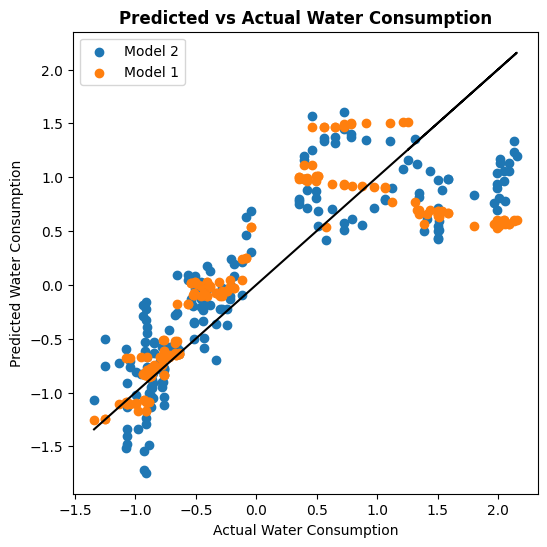

In [34]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model1.predict(X1))
plt.scatter(y, model2.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption", weight = "bold")
plt.legend({"Model 2", "Model 1"})
plt.plot(y, y,'k')
plt.show()

**Figure 8**. This plot shows water consumption predicted by model 1 (blue dots) and model 2 (orange dots) vs. actual water consumption (black line). Model 1 is a multivariate regression with 8 (all) variables as predictors of water consumption, while model 2 is a multivariate regression with only 3 variables as predictors of water consumption (those that were highly correlated, e.g., r > 0.5). Both models make predictions that are closer to the actual data at low water consumption values compared to high water consumption values. This may be because neither model captures the sharp increase around 2015/2016 well. Overall, it seems that the orange dots are somewhat closer to the ground truth (black line) when looking at low x values, than the blue dots suggesting that the simplified model may be slightly better at predicting water consumption (when ignoring considering the spike).    

**Which model is better?**

**Initial Hunch**

Model 2 is better.

The model evaluation metrics $r^2$ and mse are almost identical for model 1 ($r^2$ = 0.718; mse = 0.287) and model 2 ($r^2$ = 0.663, mse = 0.343). (Maybe model 1 is slightly better given these numbers, but this changes if I change the random state.)

In situations where two models perform almost equally well, the simpler model is always preferred, which is model 2. Additional predictors that were used by model 1 do not add value to the performance of the model and should thus not be postulated.

Additionally, the sinusoidal pattern of the predicted data points for model 1 makes me lean toward model 2.

**Likelihood Ratio Approach**

In [35]:
# run model 1 with statsmodels
y1 = df_copy['Water_Consumption']
x1 = df_copy[vars]
x1 = sm.add_constant(x1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3,  random_state = 73)

#fit regression model
model_full = sm.OLS(y1, x1).fit()

#calculate log-likelihood of model
full_ll = model_full.llf

print(full_ll)

-150.2081092977228


In [36]:
# run model 2 with statsmodels
y2 = df_copy['Water_Consumption']
x2 = df_copy[vars2]
x2 = sm.add_constant(x2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3,  random_state = 73)

#fit regression model
model_reduced = sm.OLS(y2, x2).fit()

#calculate log-likelihood of model
reduced_ll = model_reduced.llf

print(reduced_ll)

-172.8678815713925


In [37]:
# compare likelihood ratios
model_full.compare_lr_test(model_reduced)

(45.319544547339376, 1.2492592883429219e-08, 5.0)

Null Hypothesis: The more complex model (model 1) is better than the simpler model (model 2)

Likelihood ratio statistics = 45; *p*-value = 0.000; Difference in number of parameters = 5

Null hypothesis can be rejected. Model 1 is not better than model 2.

**Model 2 is better.**

**Random Forest**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import pylab as plt
import statistics
import warnings
warnings.filterwarnings("ignore")

In [62]:
# make model
rf = RandomForestRegressor(n_estimators=50, random_state=17,min_samples_leaf =5, max_depth=5)

# fit to training data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=17)

In [75]:
# accuracy on test data
print ("the model test accuracy is {:.2}".format(abs(rf.score(X_test, y_test))))
print ("the model test mse is {:.2}".format(abs(mean_squared_error(y_test, rf.predict(X_test)))))

print ("the model train accuracy is {:.2}".format(abs(rf.score(X_train, y_train))))
print ("the model test mse is {:.2}".format(abs(mean_squared_error(y_train, rf.predict(X_train)))))

the model test accuracy is 0.93
the model test mse is 0.075
the model train accuracy is 0.98
the model test mse is 0.016


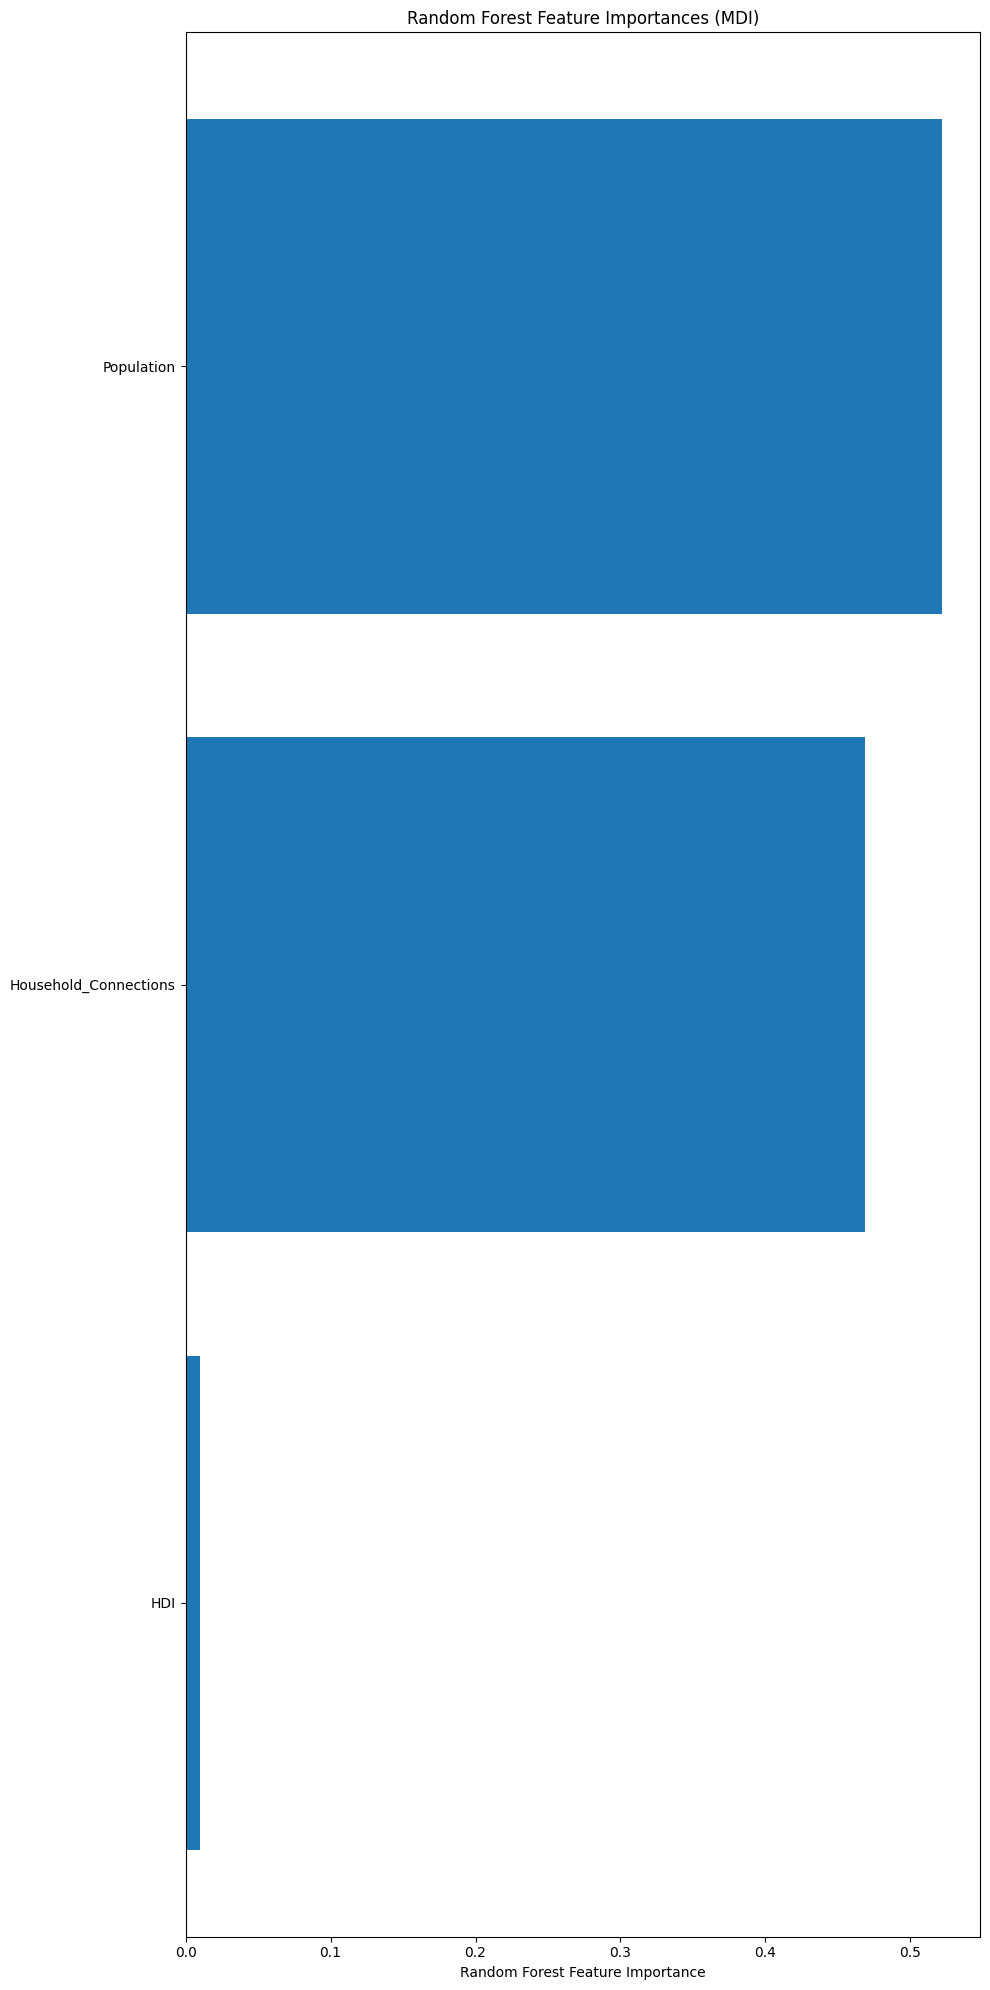

In [57]:
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,20))
plt.barh(vars2, rf.feature_importances_[sorted_idx][1:4])
plt.xlabel("Random Forest Feature Importance");
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()